# Proyecto: Análisis del Cambio Climático

### En esta práctica veremos como conectar distintos dataframes en uno solo.

Los datos de esta práctica se descargaron de:

[Temperature (°C)](https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data#GlobalLandTemperaturesByCountry.csv)

[Topic](https://data.worldbank.org/topic/climate-change)

[CO2 (kt)](https://data.worldbank.org/indicator/EN.ATM.CO2E.KT)

[Forest (km2)](https://data.worldbank.org/indicator/AG.LND.FRST.K2)

[Agricultura (km2)](https://data.worldbank.org/indicator/AG.LND.AGRI.K2)

[Population (7mM)](https://data.worldbank.org/indicator/SP.POP.TOTL)

[Electric power consumption (kWh per capita)](https://data.worldbank.org/indicator/EG.USE.ELEC.KH.PC)


## Algunas funciones especiales usadas en este script son:

`.melt( id_vars=['column_1' ,..., 'column_N'] )` <- "transpone" la información de un dataframe de tal forma que conserva las columnas indicadas en 'id_vars' y al resto de las información las encapsula en 2 nuevas columnas llamadas: 'variable' y 'value'

`.merge( tabla_1, tabla_2 , on = ['common_column_1',...,'common_column_N'], how = 'inner' )` <- Fusiona la "tabla_1" con la "tabla_2" a través de ciertas columnas en común. Es análogo al INNER JOIN que se usa en SQL.

`.corr()` <- Extrae la matriz de correlaciones de un dataframe

`sns.heatmap()` <- Genera el gráfico de un mapa de calor ('sns' hace referencia al paquete "seaborn")

`set_index('column_name')` <- Convierte los valores de la columna 'column_name' a valores índices

`.reset_index()` <- Resetea los índices de un dataframe, es decir, todos los índices se convierten en valores de columnas

`scatter_matrix( data_frame )` <- Genera una tabla con graficos de correlación. Para usar esta función hay que importarla previamente, mediante: `from pandas.plotting import scatter_matrix`

`parallel_coordinates` <- Grafica todas las variables numéricas de un dataframe caracterizandolas de acuerdo a una variable específica. Para usar esta función hay que importarla previamente, mediante: `from pandas.plotting import parallel_coordinates`



In [1]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
# Esta instrucción hace que las cantidades grandes se muestren sin notación científica
pd.set_option('display.float_format','{:,.2f}'.format)

In [3]:
# Cargamos 5 bases de datos:

# Debido a que los datos de Worldbank tienen encabezados, usamos 'header=2' para leer los datos a partir de la fila 2:

# Datos de agricultura:
df_agri = pd.read_csv('./db/Climate_Change/API_AG.LND.AGRI.K2_DS2_en_csv_v2_2812500.csv',header=2)

# Datos de deforestación:
df_fore = pd.read_csv('./db/Climate_Change/API_AG.LND.FRST.K2_DS2_en_csv_v2_2766417.csv',header=2)       

# Datos de producción electrica 
df_elec = pd.read_csv('./db/Climate_Change/API_EG.USE.ELEC.KH.PC_DS2_en_csv_v2_2766549.csv',header=2)

# Datos de producción de CO2
df_co2e = pd.read_csv('./db/Climate_Change/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_2764453.csv',header=2)

# Datos de población:
df_popu  = pd.read_csv('./db/Climate_Change/API_SP.POP.TOTL_DS2_en_csv_v2_2763937.csv',header=2)

Estos dataframes tienen las mismas columnas, así que sólo mostraremos la información de uno:

In [4]:
df_popu.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,"54,208.00","55,434.00","56,234.00","56,699.00","57,029.00","57,357.00",...,"102,565.00","103,165.00","103,776.00","104,339.00","104,865.00","105,361.00","105,846.00","106,310.00","106,766.00",NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,"130,836,765.00","134,159,786.00","137,614,644.00","141,202,036.00","144,920,186.00","148,769,974.00",...,"547,482,863.00","562,601,578.00","578,075,373.00","593,871,847.00","609,978,946.00","626,392,880.00","643,090,131.00","660,046,272.00","677,243,299.00",NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,"8,996,967.00","9,169,406.00","9,351,442.00","9,543,200.00","9,744,772.00","9,956,318.00",...,"31,161,378.00","32,269,592.00","33,370,804.00","34,413,603.00","35,383,028.00","36,296,111.00","37,171,922.00","38,041,757.00","38,928,341.00",NaN


A continuación daremos un poco de formato a los dataframes para poderlos encajar y unificar con el dataframe "GlobalLandTemperaturesByCountry.csv" que usamos en la práctica anterior.

In [5]:
# Creamos una lista de números entre 1971 y 2015 donde cada elemento de la lista sea de tipo 'str':

years = []
for y in range(1971,2015):
    years.append( str(y) )

# Mostramos los primeros 5 elementos
years[0:5]

['1971', '1972', '1973', '1974', '1975']

In [6]:
# Cleamos una lista con el nombre de las columnas con las que vamos a trabajar:

cols = ['Country Name', 'Country Code'] + years

cols[:5]

['Country Name', 'Country Code', '1971', '1972', '1973']

In [7]:
# Seleccionamos todos los registros de las columnas especificadas en 'cols':
df_agri.loc[:,cols]

# o también podemos haber usado: 
# df_agri[cols]

,Country Name,Country Code,1971,1972,1973,1974,1975,1976,1977,1978,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Aruba,ABW,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,...,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00,20.00
1,Africa Eastern and Southern,AFE,"5,360,170.00","5,365,870.00","5,366,130.00","5,367,810.00","5,371,960.00","5,374,560.00","5,374,970.00","5,385,870.00",...,"5,294,720.25","5,309,259.72","5,324,692.99","5,356,256.56","5,380,079.83","5,398,501.80","6,392,500.50","6,459,157.24","6,477,782.40","6,497,055.30"
2,Afghanistan,AFG,"380,360.00","380,460.00","380,480.00","380,480.00","380,480.00","380,480.00","380,500.00","380,500.00",...,"379,100.00","379,100.00","379,100.00","379,100.00","379,100.00","379,110.00","379,100.00","379,100.00","379,100.00","379,100.00"
3,Africa Western and Central,AFW,"3,102,665.60","3,060,380.00","3,111,330.00","3,064,870.00","3,060,690.00","3,066,700.00","3,023,890.00","3,013,030.00",...,"3,480,862.45","3,481,821.00","3,497,969.35","3,524,364.40","3,536,365.75","3,551,895.80","3,559,485.78","3,574,436.40","3,594,810.30","3,597,067.70"
4,Angola,AGO,"574,000.00","574,000.00","574,000.00","574,000.00","574,000.00","574,000.00","574,000.00","574,000.00",...,"497,366.95","502,917.56","508,468.17","514,018.78","519,569.39","525,120.00","530,670.62","536,221.24","541,771.86","547,322.48"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"5,700.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"234,260.00","234,370.00","234,420.00","234,470.00","234,600.00","234,600.00","234,600.00","234,620.00",...,"235,230.00","236,270.00","236,270.00","235,170.00","234,520.00","235,790.00","234,520.00","235,010.00","234,990.00","234,516.00"
263,South Africa,ZAF,"953,900.00","951,950.00","949,900.00","948,050.00","945,850.00","943,820.00","943,200.00","942,800.00",...,"974,830.00","968,880.00","968,900.00","971,080.00","969,880.00","968,910.00","963,740.00","963,410.00","963,410.00","963,410.00"
264,Zambia,ZMB,"200,530.00","202,510.00","201,440.00","202,020.00","202,370.00","204,100.00","202,740.00","201,550.00",...,"227,620.00","230,480.00","229,840.00","230,870.00","235,860.00","234,360.00","236,360.00","238,360.00","237,360.00","238,360.00"


In [8]:
# La función .melt() reestructura un dataframe: conserva las columnas indicadas en 'id_vars' 
# y encapsula el resto de las columnas en 2 nuevas variables: 'variable' y 'value'

df_agri.loc[:,cols].melt( id_vars=['Country Name', 'Country Code'] )

,Country Name,Country Code,variable,value
0,Aruba,ABW,1971,20.00
1,Africa Eastern and Southern,AFE,1971,"5,360,170.00"
2,Afghanistan,AFG,1971,"380,360.00"
3,Africa Western and Central,AFW,1971,"3,102,665.60"
4,Angola,AGO,1971,"574,000.00"
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,"234,516.00"
11701,South Africa,ZAF,2014,"963,410.00"
11702,Zambia,ZMB,2014,"238,360.00"


Al aplicar `.melt()` por default aparecen las columnas con nombres: 'variable' y 'value', así que renombraresmos dichas columnas

In [9]:
# Renombramos las columnas del dataframe 'df_agri':
df_agri.loc[:,cols].melt( id_vars=['Country Name', 'Country Code'] ).rename(
    columns={
        'Country Name':'Country',
        'Country Code':'name',
        'variable':'year',
        'value':'agriculture'
        })

,Country,name,year,agriculture
0,Aruba,ABW,1971,20.00
1,Africa Eastern and Southern,AFE,1971,"5,360,170.00"
2,Afghanistan,AFG,1971,"380,360.00"
3,Africa Western and Central,AFW,1971,"3,102,665.60"
4,Angola,AGO,1971,"574,000.00"
...,...,...,...,...
11699,Kosovo,XKX,2014,NaN
11700,"Yemen, Rep.",YEM,2014,"234,516.00"
11701,South Africa,ZAF,2014,"963,410.00"
11702,Zambia,ZMB,2014,"238,360.00"


A continuación creamos una función que aplique la función ".melt()" y renombre las columnas en cada uno de los dataframes:

In [10]:
def func_formato(my_dataframe, cols , col='agriculture'):
    return my_dataframe.loc[:,cols].melt( id_vars=['Country Name', 'Country Code'] ).rename(
        columns={
            'Country Name':'Country',
            'Country Code':'name',
            'variable':'year',
            'value':col
            })

In [11]:
df_agri = func_formato(df_agri , cols, col='agriculture')
df_fore = func_formato(df_fore , cols,  col='forest')
df_elec = func_formato(df_elec , cols, col='electricprod')
df_co2e = func_formato(df_co2e , cols, col='co2')
df_popu = func_formato(df_popu , cols, col='population')

In [12]:
df_popu

,Country,name,year,population
0,Aruba,ABW,1971,"59,442.00"
1,Africa Eastern and Southern,AFE,1971,"175,100,167.00"
2,Afghanistan,AFG,1971,"11,475,450.00"
3,Africa Western and Central,AFW,1971,"123,184,308.00"
4,Angola,AGO,1971,"6,041,239.00"
...,...,...,...,...
11699,Kosovo,XKX,2014,"1,812,771.00"
11700,"Yemen, Rep.",YEM,2014,"25,823,488.00"
11701,South Africa,ZAF,2014,"54,544,184.00"
11702,Zambia,ZMB,2014,"15,399,793.00"


A continuación cargamos un dataframe (ajeno a los anteriores) el cual contiene datos de temperatura global: 

In [13]:
df_temp_med = pd.read_csv('./db/temperatures_median_conutry_year.csv')
df_temp_med

,Country,dt,temperature,year
0,Afghanistan,1970-12-31,15.47,1970
1,Afghanistan,1971-12-31,14.93,1971
2,Afghanistan,1972-12-31,13.87,1972
3,Afghanistan,1973-12-31,14.91,1973
4,Afghanistan,1974-12-31,13.62,1974
...,...,...,...,...
10687,Åland,2009-12-31,5.58,2009
10688,Åland,2010-12-31,4.76,2010
10689,Åland,2011-12-31,7.50,2011
10690,Åland,2012-12-31,6.25,2012


In [14]:
df_temp_med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      10692 non-null  object 
 1   dt           10692 non-null  object 
 2   temperature  10648 non-null  float64
 3   year         10692 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 334.2+ KB


Fusionaremos todos los dataframe a través de las variables '['Country','year']' las cuales deben ser del mismo tipo en cada dataframe.

In [15]:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11704 non-null  object 
 1   name        11704 non-null  object 
 2   year        11704 non-null  object 
 3   population  11635 non-null  float64
dtypes: float64(1), object(3)
memory usage: 365.9+ KB


Vemos que la variable 'year' en un dataframe es de tipo 'int64' y 'object' en los demás dataframes, así que convertimos 'year' al tipo numérico: 

In [16]:
# Pasamos la variable 'year' del dataframe 'df_popu' al tipo 'int64'
df_popu['year'] = df_popu['year'].astype(float)
df_fore['year'] = df_fore['year'].astype(float) 
df_agri['year'] = df_agri['year'].astype(float) 
df_elec['year'] = df_elec['year'].astype(float) 
df_co2e['year'] = df_co2e['year'].astype(float) 

In [17]:
# Verificamos que se hayan aplicado los cambios:
df_popu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11704 entries, 0 to 11703
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     11704 non-null  object 
 1   name        11704 non-null  object 
 2   year        11704 non-null  float64
 3   population  11635 non-null  float64
dtypes: float64(2), object(2)
memory usage: 365.9+ KB


In [23]:
df_new = df_temp_med[['Country','temperature','year']]
df_new

,Country,temperature,year
0,Afghanistan,15.47,1970
1,Afghanistan,14.93,1971
2,Afghanistan,13.87,1972
3,Afghanistan,14.91,1973
4,Afghanistan,13.62,1974
...,...,...,...
10687,Åland,5.58,2009
10688,Åland,4.76,2010
10689,Åland,7.50,2011
10690,Åland,6.25,2012


Ya que las variables '['Country','year']' son del mismo tipo, hacemos la fusión con `pd.merge()`

`.merge( tabla_1, tabla_2 , on = ['common_column_1',...,'common_column_N'], how = 'inner' )` <- Fusiona la "tabla_1" con la "tabla_2" a través de ciertas columnas en común. Es análogo al INNER JOIN que se usa en SQL.  

In [24]:
# Fusionamos el dataframe 'df_temp_med[['Country','temperature','year']]' con el dataframe 'df_popu':

df_merge = pd.merge( df_new, df_popu , on = ['Country','year'], how = 'inner' )

df_merge

,Country,temperature,year,name,population
0,Afghanistan,14.93,1971,AFG,"11,475,450.00"
1,Afghanistan,13.87,1972,AFG,"11,791,222.00"
2,Afghanistan,14.91,1973,AFG,"12,108,963.00"
3,Afghanistan,13.62,1974,AFG,"12,412,960.00"
4,Afghanistan,13.51,1975,AFG,"12,689,164.00"
...,...,...,...,...,...
7219,Zimbabwe,22.49,2009,ZWE,"12,526,964.00"
7220,Zimbabwe,23.30,2010,ZWE,"12,697,728.00"
7221,Zimbabwe,22.94,2011,ZWE,"12,894,323.00"
7222,Zimbabwe,23.05,2012,ZWE,"13,115,149.00"


In [19]:
# Hacemos la fusión con el resto de dataframes:

# Fusionamos el dataframe 'df_merge' con el dataframe 'df_co2e':
df_merge = pd.merge(df_merge,
                    df_co2e,
                    on = ['Country','name','year'],
                    how = 'inner')


# Fusionamos el dataframe 'df_merge' con el dataframe 'df_elec':
df_merge = pd.merge(df_merge,
                    df_elec,
                    on = ['Country','name','year'],
                    how = 'inner')


# Fusionamos el dataframe 'df_merge' con el dataframe 'df_agri':
df_merge = pd.merge(df_merge,
                    df_agri,
                    on = ['Country','name','year'],
                    how = 'inner')

# Fusionamos el dataframe 'df_merge' con el dataframe 'df_fore':
df_merge = pd.merge(df_merge,
                    df_fore,
                    on = ['Country','name','year'],
                    how = 'inner')
df_merge

,Country,temperature,year,name,population,co2,electricprod,agriculture,forest
0,Afghanistan,14.93,1971,AFG,"11,475,450.00","1,895.84",NaN,"380,360.00",NaN
1,Afghanistan,13.87,1972,AFG,"11,791,222.00","1,532.81",NaN,"380,460.00",NaN
2,Afghanistan,14.91,1973,AFG,"12,108,963.00","1,639.15",NaN,"380,480.00",NaN
3,Afghanistan,13.62,1974,AFG,"12,412,960.00","1,917.84",NaN,"380,480.00",NaN
4,Afghanistan,13.51,1975,AFG,"12,689,164.00","2,126.86",NaN,"380,480.00",NaN
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.49,2009,ZWE,"12,526,964.00","7,750.00",585.46,"163,000.00","179,513.50"
7220,Zimbabwe,23.30,2010,ZWE,"12,697,728.00","9,810.00",606.64,"162,000.00","179,052.80"
7221,Zimbabwe,22.94,2011,ZWE,"12,894,323.00","11,490.00",636.25,"164,000.00","178,592.10"
7222,Zimbabwe,23.05,2012,ZWE,"13,115,149.00","12,110.00",608.76,"162,000.00","178,131.40"


In [20]:
# Eliminamos los registrso con campos nulos 'NaN':

df_climate = df_merge.dropna()

df_climate

,Country,temperature,year,name,population,co2,electricprod,agriculture,forest
62,Albania,13.45,1990,ALB,"3,286,542.00","6,050.00",552.25,"11,210.00","7,888.00"
63,Albania,11.59,1991,ALB,"3,266,790.00","4,110.00",418.45,"11,270.00","7,868.50"
64,Albania,13.59,1992,ALB,"3,247,039.00","2,240.00",453.64,"11,270.00","7,849.00"
65,Albania,13.65,1993,ALB,"3,227,287.00","2,070.00",536.36,"11,260.00","7,829.50"
66,Albania,13.24,1994,ALB,"3,207,536.00","2,140.00",596.41,"11,260.00","7,810.00"
...,...,...,...,...,...,...,...,...,...
7219,Zimbabwe,22.49,2009,ZWE,"12,526,964.00","7,750.00",585.46,"163,000.00","179,513.50"
7220,Zimbabwe,23.30,2010,ZWE,"12,697,728.00","9,810.00",606.64,"162,000.00","179,052.80"
7221,Zimbabwe,22.94,2011,ZWE,"12,894,323.00","11,490.00",636.25,"164,000.00","178,592.10"
7222,Zimbabwe,23.05,2012,ZWE,"13,115,149.00","12,110.00",608.76,"162,000.00","178,131.40"


In [21]:
# Obtenemos la matriz de correlación de cada variable (unicamente se obtiene la correlación de las variables numéricas)
df_climate.corr()

,temperature,year,population,co2,electricprod,agriculture,forest
temperature,1.00,0.02,-0.02,-0.21,-0.45,-0.11,-0.14
year,0.02,1.00,0.02,0.03,0.08,-0.01,-0.02
population,-0.02,0.02,1.00,0.63,-0.05,0.63,0.36
co2,-0.21,0.03,0.63,1.00,0.20,0.78,0.66
electricprod,-0.45,0.08,-0.05,0.20,1.00,0.11,0.18
agriculture,-0.11,-0.01,0.63,0.78,0.11,1.00,0.70
forest,-0.14,-0.02,0.36,0.66,0.18,0.70,1.00


<AxesSubplot:>

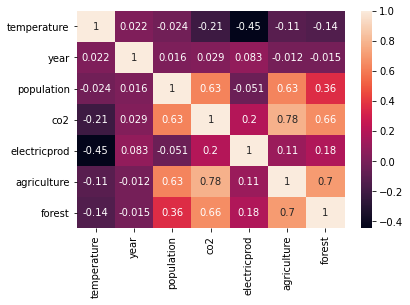

In [22]:
# Aplicamos un 'sns.heatmap()' a la matriz de correlación 
sns.heatmap( df_climate.corr() , annot=True )

Podemos ver que la producción de co2 esta altamente correlacionada (positivamente, ie. si aumenta la producción de co2 aumentan las otras variables y viceversa) con la población, con la agricultura y deforestación 

Agrupamos con respecto a 'Country' y ordenamos de manera descendente para ver los países que más producen co2 hasta los que menos co2 producen

In [25]:
df_climate.groupby(['Country'])[['co2']].median().sort_values(['co2'], ascending=False )

,co2
Country,
North America,"5,979,791.34"
United States,"5,470,430.00"
China,"3,667,540.00"
Japan,"1,173,390.00"
India,"970,705.00"
...,...
Suriname,"1,500.00"
Mozambique,"1,500.00"
Togo,"1,430.00"


In [26]:
# Extraemos los nombre de los 10 primeros países que más co2 producen:

fisrt_10 = df_climate.groupby(['Country'])[['co2']].median().sort_values(['co2'], ascending=False ).head(10).index
fisrt_10

Index(['North America', 'United States', 'China', 'Japan', 'India', 'Germany',
       'United Kingdom', 'Canada', 'Italy', 'Mexico'],
      dtype='object', name='Country')

In [27]:
# Extraemos los registros del dataframe 'df_climate' correspondientes a los 'fisrt_10' países que producen más co2:

df_max_co2 = df_climate[ df_climate['Country'].isin(fisrt_10) ]

df_max_co2

,Country,temperature,year,name,population,co2,electricprod,agriculture,forest
1266,Canada,-4.64,1990,CAN,"27,691,138.00","419,120.00","16,167.37","614,030.00","3,482,729.30"
1267,Canada,-4.24,1991,CAN,"28,037,420.00","412,930.00","16,181.59","615,332.46","3,482,258.34"
1268,Canada,-5.04,1992,CAN,"28,371,264.00","426,000.00","16,164.42","614,650.00","3,481,787.38"
1269,Canada,-4.03,1993,CAN,"28,684,764.00","422,680.00","16,320.13","613,970.00","3,481,316.42"
1270,Canada,-3.44,1994,CAN,"29,000,663.00","438,820.00","16,388.28","613,290.00","3,480,845.46"
...,...,...,...,...,...,...,...,...,...
7004,United States,8.35,2009,USA,"306,771,529.00","5,159,550.00","12,913.71","4,089,470.00","3,082,016.00"
7005,United States,10.23,2010,USA,"309,327,143.00","5,392,870.00","13,394.90","4,069,917.00","3,087,200.00"
7006,United States,9.54,2011,USA,"311,583,481.00","5,172,100.00","13,245.88","4,050,364.00","3,089,950.00"
7007,United States,9.94,2012,USA,"313,877,662.00","4,950,210.00","12,964.19","4,030,810.54","3,092,700.00"


In [28]:
# Convertimos las valores de la columna 'Country'  a valores índices:
df_max_co2.set_index('Country')

,temperature,year,name,population,co2,electricprod,agriculture,forest
Country,,,,,,,,
Canada,-4.64,1990,CAN,"27,691,138.00","419,120.00","16,167.37","614,030.00","3,482,729.30"
Canada,-4.24,1991,CAN,"28,037,420.00","412,930.00","16,181.59","615,332.46","3,482,258.34"
Canada,-5.04,1992,CAN,"28,371,264.00","426,000.00","16,164.42","614,650.00","3,481,787.38"
Canada,-4.03,1993,CAN,"28,684,764.00","422,680.00","16,320.13","613,970.00","3,481,316.42"
Canada,-3.44,1994,CAN,"29,000,663.00","438,820.00","16,388.28","613,290.00","3,480,845.46"
...,...,...,...,...,...,...,...,...
United States,8.35,2009,USA,"306,771,529.00","5,159,550.00","12,913.71","4,089,470.00","3,082,016.00"
United States,10.23,2010,USA,"309,327,143.00","5,392,870.00","13,394.90","4,069,917.00","3,087,200.00"
United States,9.54,2011,USA,"311,583,481.00","5,172,100.00","13,245.88","4,050,364.00","3,089,950.00"


<AxesSubplot:xlabel='population', ylabel='co2'>

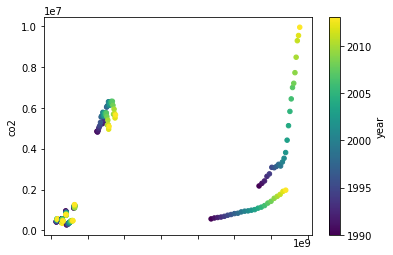

In [37]:
# Hacemos un scatter plot:

df_max_co2.set_index('Country').plot.scatter(
    x='population',
    y='co2',
    c='year', # <-- color definido por el año
    colormap='viridis' # <-- estilo de color
)


En la grafica anterior podemos ver que el aumento de la población genera un aumento en la producción de co2

In [38]:
# Extraemos la mediana de las variables agrupada por 'year':
df_med = df_climate.groupby(['year']).median()
df_med

,temperature,population,co2,electricprod,agriculture,forest
year,,,,,,
1990,22.70,"10,230,931.00","29,250.00","1,157.36","91,700.00","63,710.00"
1991,22.43,"10,346,663.50","27,345.00","1,072.52","91,870.00","63,349.10"
1992,19.85,"9,748,274.50","24,085.00","1,451.81","89,700.00","46,809.75"
1993,20.58,"9,877,647.00","24,080.00","1,520.28","83,965.00","45,837.11"
1994,20.46,"10,014,523.50","25,515.00","1,582.73","85,220.00","45,468.48"
1995,20.03,"10,081,493.50","27,300.00","1,606.37","77,575.00","44,901.75"
1996,19.94,"10,110,291.00","28,315.00","1,707.60","78,345.00","44,265.75"
1997,20.19,"10,112,988.50","28,945.00","1,782.63","79,280.00","43,629.75"
1998,21.18,"10,114,598.00","28,965.00","1,807.83","80,410.00","42,993.75"


In [39]:
# Reseteamos los índices para que aparezcan como componentes de una columna:

df_med = df_med.reset_index()
df_med

,year,temperature,population,co2,electricprod,agriculture,forest
0,1990,22.70,"10,230,931.00","29,250.00","1,157.36","91,700.00","63,710.00"
1,1991,22.43,"10,346,663.50","27,345.00","1,072.52","91,870.00","63,349.10"
2,1992,19.85,"9,748,274.50","24,085.00","1,451.81","89,700.00","46,809.75"
3,1993,20.58,"9,877,647.00","24,080.00","1,520.28","83,965.00","45,837.11"
4,1994,20.46,"10,014,523.50","25,515.00","1,582.73","85,220.00","45,468.48"
5,1995,20.03,"10,081,493.50","27,300.00","1,606.37","77,575.00","44,901.75"
6,1996,19.94,"10,110,291.00","28,315.00","1,707.60","78,345.00","44,265.75"
7,1997,20.19,"10,112,988.50","28,945.00","1,782.63","79,280.00","43,629.75"
8,1998,21.18,"10,114,598.00","28,965.00","1,807.83","80,410.00","42,993.75"
9,1999,21.06,"10,179,196.00","30,720.00","1,873.87","82,440.00","42,357.75"


<AxesSubplot:>

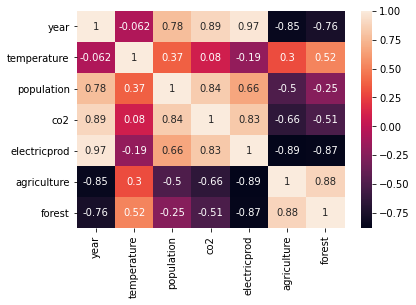

In [40]:
sns.heatmap(df_med.corr() , annot=True)

A continuación mostraremos un gráfico que incluye diagramas de dispersión para cada par de variables

In [41]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='year', ylabel='year'>,
        <AxesSubplot:xlabel='temperature', ylabel='year'>,
        <AxesSubplot:xlabel='population', ylabel='year'>,
        <AxesSubplot:xlabel='co2', ylabel='year'>,
        <AxesSubplot:xlabel='electricprod', ylabel='year'>,
        <AxesSubplot:xlabel='agriculture', ylabel='year'>,
        <AxesSubplot:xlabel='forest', ylabel='year'>],
       [<AxesSubplot:xlabel='year', ylabel='temperature'>,
        <AxesSubplot:xlabel='temperature', ylabel='temperature'>,
        <AxesSubplot:xlabel='population', ylabel='temperature'>,
        <AxesSubplot:xlabel='co2', ylabel='temperature'>,
        <AxesSubplot:xlabel='electricprod', ylabel='temperature'>,
        <AxesSubplot:xlabel='agriculture', ylabel='temperature'>,
        <AxesSubplot:xlabel='forest', ylabel='temperature'>],
       [<AxesSubplot:xlabel='year', ylabel='population'>,
        <AxesSubplot:xlabel='temperature', ylabel='population'>,
        <AxesSubplot:xlabel='population'

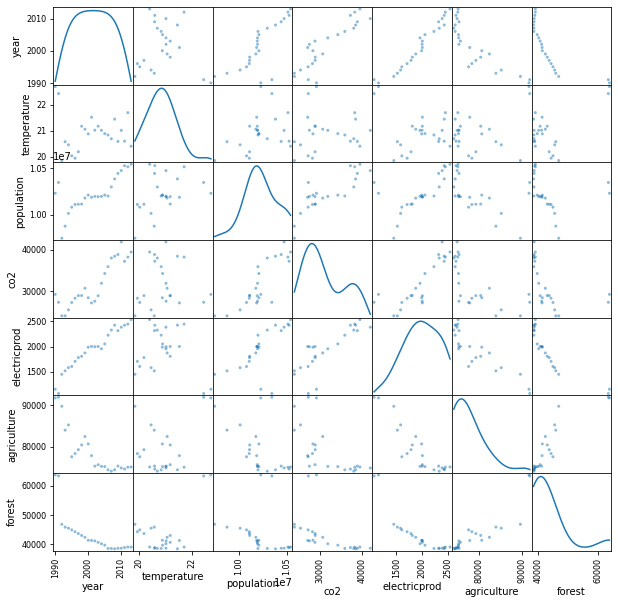

In [42]:
scatter_matrix(df_med, figsize=(10,10), diagonal='kde')

Aquí se muestra un diagrama de dsipersión entre todas las variables, 'diagonal='kde' hace que en la diagonal se muestre la gráfca de distribución de probabilidad no paramétrica

A continuación mostraremos una gráfica que muestra la informacíon de todas las variables de un dataframe agrupadas por alguna variable específica

In [43]:
from pandas.plotting import parallel_coordinates

In [44]:
# Dado que necesitamos un dataset más compacto, seleccionamermos algunos países de sudamérica:

countries = ['Colombia', 'Argentina','Bolivia','Mexico', 'Peru','Chile']

In [45]:
# Extraemos solo la información de algunos países:
df_sudamerica = df_climate[ df_climate['Country'].isin(countries) ]

In [46]:
# Extraemos sólo algunas variales:
# Extraemos sólo algunas variales:
df_sudamerica = df_sudamerica[['Country','temperature','co2','agriculture','forest']]
df_sudamerica

,Country,temperature,co2,agriculture,forest
277,Argentina,15.44,"99,840.00","1,275,650.00","352,040.00"
278,Argentina,14.92,"105,320.00","1,276,600.00","350,214.00"
279,Argentina,14.95,"107,350.00","1,277,550.00","348,388.00"
280,Argentina,15.48,"111,030.00","1,278,500.00","346,562.00"
281,Argentina,15.00,"113,810.00","1,279,480.00","344,736.00"
...,...,...,...,...,...
5370,Peru,20.59,"41,680.00","239,460.00","741,746.03"
5371,Peru,20.53,"45,570.00","240,230.00","740,498.00"
5372,Peru,20.30,"48,580.00","241,040.00","738,787.46"
5373,Peru,20.61,"48,370.00","243,321.00","737,076.92"


<AxesSubplot:>

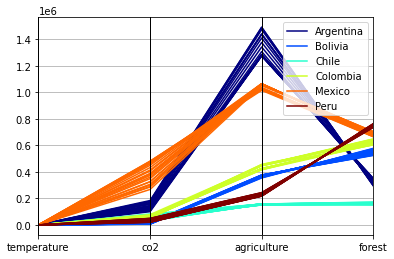

In [47]:
# Graficamos el comportamiento de las variables del dataframe 'df_sudamerica' caracterizadas por la variable 'Country'

parallel_coordinates(df_sudamerica , 'Country' , colormap='jet')

De esta gŕafica podemos observar que Mexico registra altas temperaturas y mayor producción de co2, menos agricultura que Argentina y menos deforestación que Peru